In [1]:
## imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
## bucketizing function
def convert_y(dataY):
    y = []
    for i in range (len(dataY)):
        if(dataY[i] > 50):
            y.append(0)
        else:
            y.append(1)
    return np.array(y)

In [3]:
## reading the music data
dataX = pd.read_csv('./datasets/spotofy_music_normalized.csv')
dataY = pd.read_csv('./datasets/spotofy_music_labels.csv')
dataY_multi = pd.read_csv('./datasets/spotofy_music_labels.csv')
Y = convert_y(np.array(dataY))
dataX.head()

,Explicit,Artist_followers,Track_number_on_album,Acousticness,Danceability,Energy,Liveness,Loudness,Speechiness,Tempo,Mode,Key,Valence
0,1.112882,1.012971,-0.703623,-0.253508,-0.056900,-0.257351,-0.321798,-0.287111,1.295366,2.132090,0.865448,0.478965,0.209096
1,-0.898356,0.172558,-0.703623,0.798171,0.424214,-0.688588,-0.492682,0.282796,-0.811102,-0.910119,0.865448,0.752338,0.774957
2,-0.898356,-0.658039,-0.703623,0.764382,0.223151,0.783781,0.019972,0.893382,-0.654093,-0.677720,-1.155199,1.025710,1.138724
3,-0.898356,-0.471741,1.732316,-0.619272,-1.528965,0.506556,-0.410955,0.398452,-0.609112,2.593547,0.865448,0.752338,-1.555849
4,-0.898356,0.029319,-0.703623,-0.683893,0.330863,-1.138308,1.097289,-0.823916,-0.601473,-0.142817,0.865448,-1.434643,-1.806445


In [4]:
dataY.shape

(4247, 1)

In [16]:
## dimensionality reduction via Principal Component Anlysis (PCA) to 2 dimensions only for visualization
reduced_data = PCA(n_components=2).fit_transform(dataX)
## applying k-means clustering on dimension reduced data with 4 clusters
kmeans = KMeans(init="k-means++", n_init=4)
kmeans.fit(reduced_data)

KMeans(n_init=4)

In [19]:
from sklearn.metrics import silhouette_score
## testing for different number f clusters, which gives the best metric
scores = []
for i in range(2,30):
    reduced_data = PCA(n_components=2).fit_transform(dataX)
    kmeans = KMeans(init="k-means++", n_init=4, n_clusters=i)
    kmeans.fit(reduced_data)
    scores.append(silhouette_score(reduced_data, kmeans.labels_))

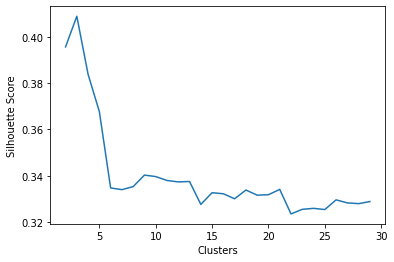

In [20]:
plt.plot(range(2,30), scores)
plt.ylabel("Silhouette Score")
plt.xlabel("Clusters")
plt.show()

In [21]:
## 3 number of clusters give the best score
np.argmax(scores)

1

In [29]:
## applying k-means clustering with 3 clusters only
kmeans_3 = KMeans(init="k-means++", n_init=4, n_clusters=3)
kmeans_3.fit(reduced_data)

KMeans(n_clusters=3, n_init=4)

In [28]:
## testing if the clusters can be used to signify labels
indices = [j for j in range(len(kmeans.labels_)) if kmeans.labels_[j]==0]
y = [Y[j] for j in indices]
accuracy_score([1]*len(y), y)

0.5

In [11]:
len(reduced_data)

4247

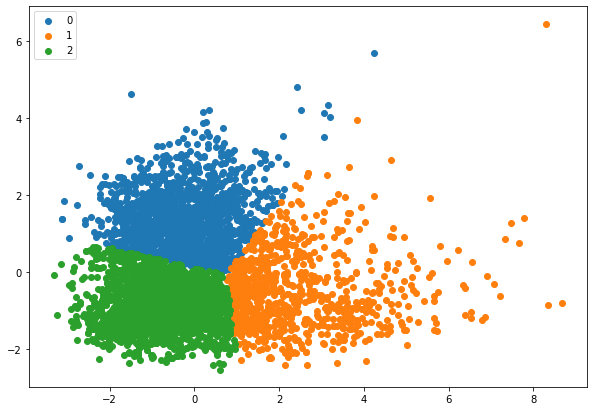

In [31]:
## plotting theclustered data with different colours in a single plot
plt.figure(figsize=(10,7))
for i in range(3):
    indices = [j for j in range(len(kmeans_3.labels_)) if kmeans_3.labels_[j]==i]
    plotting = [reduced_data[j] for j in indices]
    plt.scatter([x for x,_ in plotting], [y for _,y in plotting], label = f"{i}")
plt.legend()
plt.show()

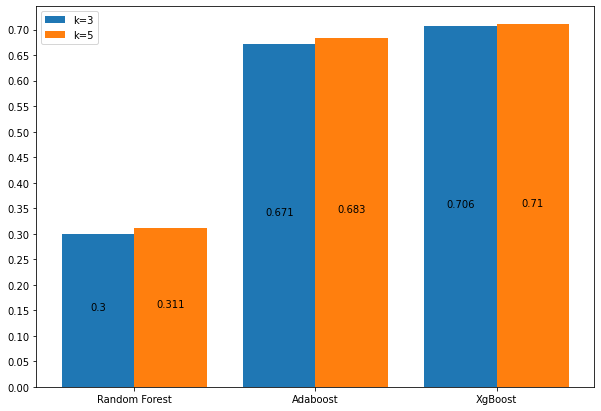

In [50]:
## plotting bar graph for report
X = ['Random Forest', 'Adaboost', 'XgBoost']
Y_3 = [0.300,0.671,0.706] ## k=3
Y_5 = [0.311,0.683,0.710] ## k=5
def addlabels(x,y, p = 0.2):
    for i in range(len(x)):
        plt.text(i+p, y[i]/2, y[i], ha = 'center')

plt.figure(figsize=(10,7))
plt.bar(np.arange(len(X))-0.2, Y_3, 0.4, label = "k=3", alpha = 1)
plt.bar(np.arange(len(X))+0.2, Y_5, 0.4, label = "k=5", alpha = 1)
plt.xticks(np.arange(len(X)), X)
addlabels(np.arange(len(X)), Y_3,p=-0.2)
addlabels(np.arange(len(X)), Y_5,p=+0.2)
plt.yticks([0.05*i for i in range(15)])
plt.legend()
plt.show()
